 - 차원 축소
    - 여러 특징을 더 적은 차원(예: 2차원, 3차원, ..)으로 줄이기

512 * 512 = 25500 ~ => 50 ~ 100개정도 차원 (손실이 생각보다 많이 없다)
시각화할때만 2차원으로 차원축소 -> 시각화


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [8]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [9]:
iris_df = pd.DataFrame(
    iris_data.data,                     # iris 입력 특성 데이터
    columns = iris_data.feature_names   # 특성 이름
)

iris_df['target'] = iris_data.target    # 클래스 라벨 추가

iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


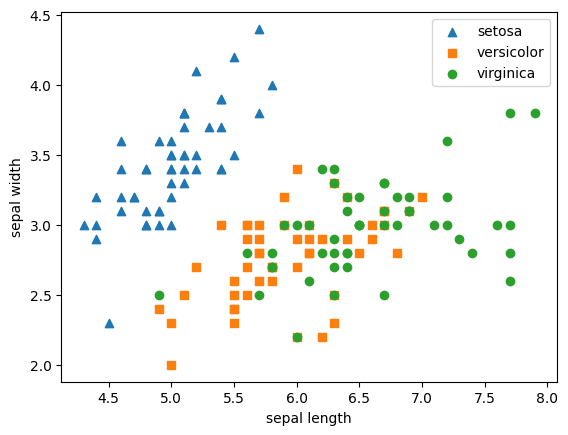

In [11]:
markers = ['^','s','o'] # 클래스 마커 모양
for i, marker in enumerate(markers):
    x_data = iris_df[iris_data.target == i]['sepal length (cm)']    # 꽃받침에 길이
    y_data = iris_df[iris_data.target == i]['sepal width (cm)']     # 꽃받침에 넓이
    plt.scatter(x_data, y_data, marker=marker, label = iris_data.target_names[i])   # 클래스별 산점도

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

특성 2개만 확인했기 때문에 겹치는 데이터가 있다.

In [13]:
# 차원 축소 전 스케일링 진행
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()                                       # 스케일러 객체 생성
scaler.fit(iris_df.drop('target', axis = 1))                    # 입력 특성 기준으로 평균/표준편차 학습
iris_scaled = scaler.transform(iris_df.drop('target', axis=1))  # 특성 데이터 표준화

iris_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [ ]:
# pca를 사용해서 4차원 특성 데이터를 2차원으로 축소(중점 : 정보 손실을 최소화)
from sklearn.decomposition import PCA
pca = PCA(n_components= 2)
# pca.fit(isi
#         )_
 
# iriss=ps

In [ ]:
iris_df = pd.DataFrame(
    iris+[ca,
          columns=[['pca_componoent_1', 'pca_componoent_1']]]
          columns=[['pca_componoent_1', 'pca_componoent_2plt.scatter (x_Data,)']]]
)

_

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)


In [ ]:
for i, marker in enumerate(markers):
    x_data = iri

LDA로 축소한 결과가 pca로 축소한 결과보다 클래스간 분리가 더 뚜렷하게 나타났다

In [ ]:
!pip install xlrd

In [18]:
import pandas as pd

df= pd.read_excel(
    './data/pca_credit_card.xls',   # 신용카드 데이터 파일
    header=1,                       # 두번째 행을 컬럼명으로 사용
)                                   # 사용할 시트 이름

df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [20]:
df.info()   # 데이터 프레임 구조 및 컬럼 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [21]:
df.rename(
    columns={'PAY_0' : 'PAY_1', 'default payment next month' : 'default'},inplace=True
)

- 단변량(일변량), 다변량 확인
    - 일변량 : 각 컬럼의 분포 및 이상 여부 확인
    - 다변량 : 변수 간 상관관계 분석

In [22]:
# 분석에 상관없는 ID 컬럼 제거
df.drop('ID', axis = 1, inplace = True) # 
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [23]:
# X_data, Y_data 나누기
X_data = df.drop('default', axis=1) # 입력특성 x
X_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


In [24]:
Y_data = df['default']  # 타겟 변수 y
Y_data

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default, Length: 30000, dtype: int64

In [25]:
# 피어슨 상관 계수 : 1,-1에 가까울 수록 강한 상관관계, 0에 가까울수록 상관관계가 없다
corr= X_data.corr()
corr

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,-0.235195,0.285430,0.278314,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,-0.044008,-0.033642,-0.031183,-0.024563,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,0.082316,0.023581,0.018749,0.013002,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,0.034345,-0.023472,-0.021602,-0.024909,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,-0.048773,0.056239,0.054283,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_1,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,0.474553,0.187068,0.189859,0.179785,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,0.575501,0.234887,0.235257,0.224146,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,0.632684,0.208473,0.237295,0.227494,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,0.716449,0.202812,0.225816,0.244983,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,0.816900,0.206684,0.226913,0.243335,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027


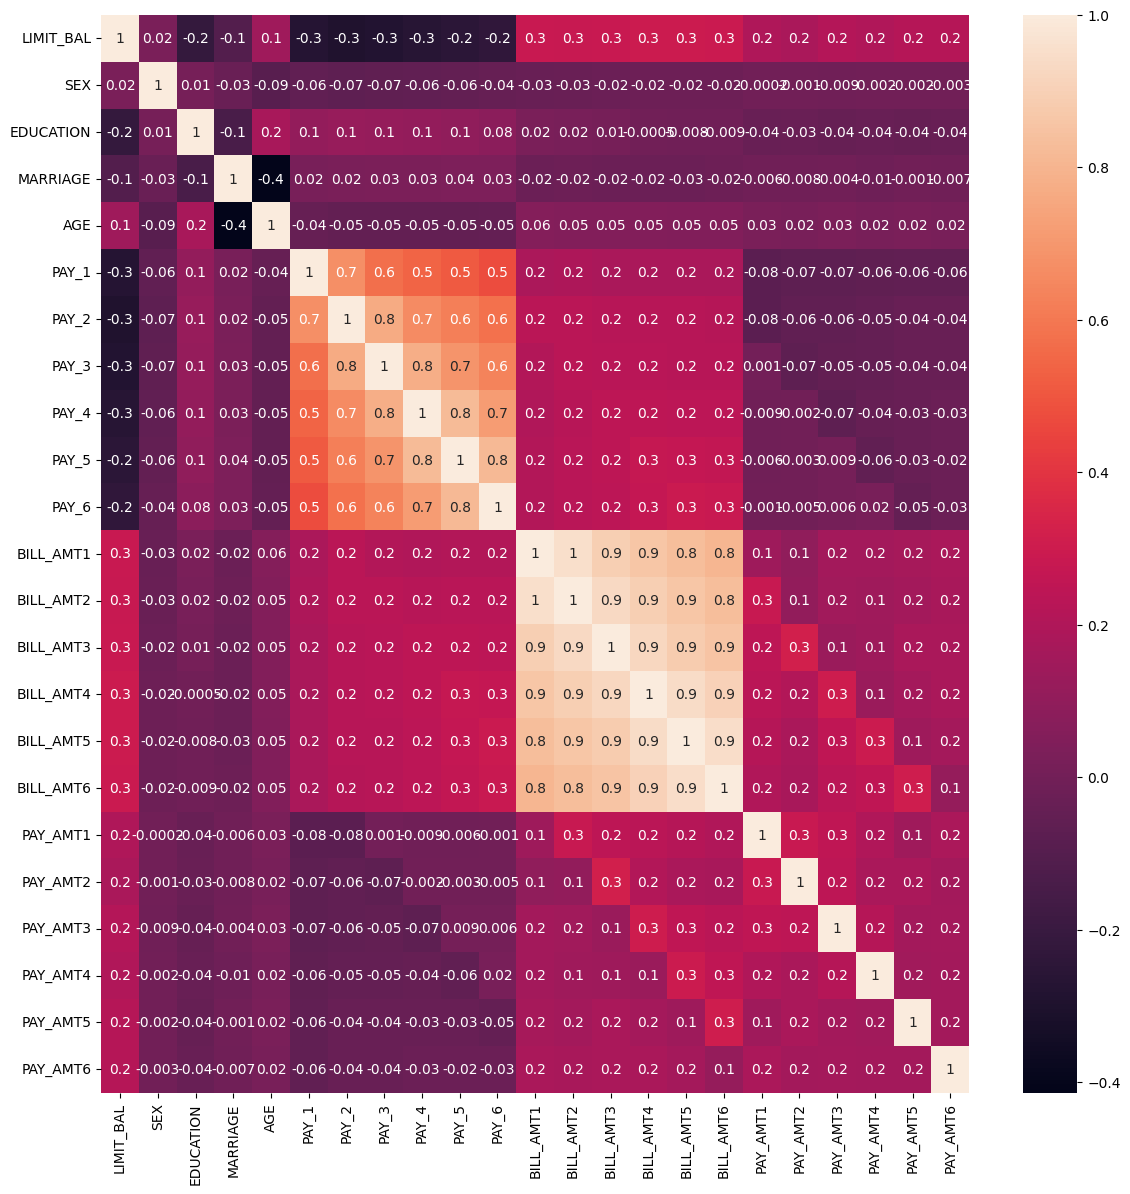

In [27]:
# 히트맵으로 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
sns.heatmap(
            corr,       # 상관계수
            annot=True, # 내부값 표시
            fmt='.1g')  # 유효숫자 1자리
plt.show()

BILL_AMT1 ~ BILL_AMT6은 강한 상관관계를 가지고있어 차원축소 (PCA등)을 적용하면 성능이 개선될 것으로 가능성이 있다

In [28]:
X_data.iloc[:,11:17] # 상관관계가 높은 컬럼들

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
0,3913,3102,689,0,0,0
1,2682,1725,2682,3272,3455,3261
2,29239,14027,13559,14331,14948,15549
3,46990,48233,49291,28314,28959,29547
4,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29995,188948,192815,208365,88004,31237,15980
29996,1683,1828,3502,8979,5190,0
29997,3565,3356,2758,20878,20582,19357
29998,-1645,78379,76304,52774,11855,48944


In [30]:
# 차원 축소 전 데이터 스케일링
from sklearn.decomposition import PCA               # 차원축소도구
from sklearn.preprocessing import StandardScaler    # 표준화 도구

scaler = StandardScaler()                           # 스케일러 객체 생성
scaler.fit(X_data.iloc[:,11:17])                    # 차원 축소 대상 컬럼 기준으로 학습
X_scaled = scaler.transform(X_data.iloc[:,11:17])   # 데이터 표준화
X_scaled

array([[-0.64250107, -0.64739923, -0.66799331, -0.67249727, -0.66305853,
        -0.65272422],
       [-0.65921875, -0.66674657, -0.63925429, -0.62163594, -0.60622927,
        -0.59796638],
       [-0.29855966, -0.49389911, -0.48240819, -0.44973025, -0.41718767,
        -0.39162956],
       ...,
       [-0.64722711, -0.64383044, -0.63815838, -0.34796096, -0.32451732,
        -0.32768664],
       [-0.71798186,  0.41026929,  0.42237335,  0.14784373, -0.46806261,
         0.16913036],
       [-0.04473888, -0.00385085,  0.03966713, -0.10458204, -0.12966943,
        -0.39559241]], shape=(30000, 6))

In [ ]:
# 6개 특성을 2개 주성분으로 차원 축소
pca = PCA(n_components=2)       # 2차원으로 축소
pca.fit(X_scaled)               # 주성분 학습
X_pca = pca.transform(X_scaled) # 차원 축소 적용
# 앞 두줄은 X_pca = pca.fit_transform(X_scaled) 와 동일하다

X_pca

array([[-1.61114812,  0.01247912],
       [-1.54759523, -0.06234401],
       [-1.03587378,  0.01125622],
       ...,
       [-1.19551872, -0.3595072 ],
       [-0.00829343, -0.04995798],
       [-0.25828552,  0.26525237]], shape=(30000, 2))

- 설명 분산 비율 
    - 차원 축소가 정보를 얼마나 보존했는지를 판단한다.


In [32]:
pca.explained_variance_ratio_   # 각 주성분이 설명하는 분산 비율

array([0.90555253, 0.0509867 ])

In [35]:
print(X_data.iloc[:,11:17].shape)
print(y_data.shape)
print(y_data[:5])

(30000, 6)
(50,)
100    3.3
101    2.7
102    3.0
103    2.9
104    3.0
Name: sepal width (cm), dtype: float64


6개 -> 2개 차원으로 축소했을 때 전체 분산의 약 95%를 설명
분산 비율이 너무 낮으면 차원 축소로 인해 성능이 저하될 가능성이 있다

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    X_data.iloc[:, 11:17],  # 차원 축소 전 원본 특성
    y_data,                 # 타겟변수
    test_size = 0.2,        # 테스트 데이터 비율
    random_state=42
)

model = LogisticRegression(max_iter=1000)   # 로지스틱 회귀 모델(반복횟수 1000)
model.fit(X_train, y_train)                 # 테스트 데이터 학습
pred = model.predict(X_test)                # 예측

accuracy_score(y_test, pred)                # 차원 축소 전 성능

ValueError: Found input variables with inconsistent numbers of samples: [30000, 50]

In [34]:
# 차원 축소 전 vs 후 성능 비교
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 차원 축소 전
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca,                  # PCA로 차원 축소 된 특성
    y_data,                 # 타겟 변수
    test_size= 0.2,         # 테스트 데이터 비율
    random_state=42
)

# model = LogisticRegression(max_iter=1000)   # 로지스틱 회귀 모델(반복횟수 1000)
model.fit(X_train_pca,y_train)                  # 테스트 데이터 학습
pred = model.predict(X_test_pca)                # 예측

accuracy_score(y_test, pred)                # 차원 축소 전 성능


ValueError: Found input variables with inconsistent numbers of samples: [30000, 50]